In [5]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Set paths to dataset
train_dir = r"C:\Users\Varnika\Downloads\casting_512x512"  # Replace with your extracted folder path

In [12]:
# Preprocess the data with data augmentation
data_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)


In [13]:
train_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 1041 images belonging to 2 classes.


In [14]:
val_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 259 images belonging to 2 classes.


In [15]:
# Display class indices
class_indices = train_data.class_indices
print("Class Indices:", class_indices)

Class Indices: {'def_front': 0, 'ok_front': 1}


In [16]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\Varnika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10,
                    verbose=1)

Epoch 1/10


C:\Users\Varnika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 404ms/step - accuracy: 0.5782 - loss: 0.7793 - val_accuracy: 0.6795 - val_loss: 0.5931
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.7217 - loss: 0.5564 - val_accuracy: 0.7104 - val_loss: 0.5490
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.7330 - loss: 0.4996 - val_accuracy: 0.7220 - val_loss: 0.5540
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.7930 - loss: 0.4316 - val_accuracy: 0.7838 - val_loss: 0.4303
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - accuracy: 0.8204 - loss: 0.3892 - val_accuracy: 0.8378 - val_loss: 0.3472
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 337ms/step - accuracy: 0.8523 - loss: 0.3153 - val_accuracy: 0.8147 - val_loss: 0.3571
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.8667 - loss: 0.3070 - val_accuracy: 0.9073 - val_loss: 0.2255
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.9157 - loss: 0.1923 - val_accuracy: 0.899

In [19]:
# Evaluate the model
val_data.reset()
y_pred = (model.predict(val_data) > 0.5).astype("int32").flatten()
y_true = val_data.classes

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


In [20]:
# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['non-defective', 'defective']))


Classification Report:
                precision    recall  f1-score   support

non-defective       0.61      0.54      0.57       156
    defective       0.40      0.47      0.43       103

     accuracy                           0.51       259
    macro avg       0.51      0.51      0.50       259
 weighted avg       0.53      0.51      0.52       259



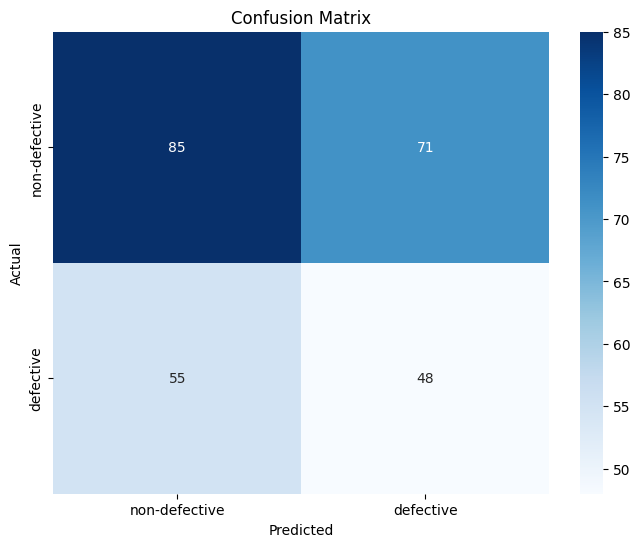

In [21]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['non-defective', 'defective'], yticklabels=['non-defective', 'defective'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()